Cluster and GT comparison

GMM and GT comparison

In [2]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier

In [17]:
pca_result =pd.read_csv('pca_dataframe.csv', low_memory=False).to_numpy()
df = pd.DataFrame(pca_result[:,:2])
y = pd.read_csv('ddos_dataset.csv', low_memory=False)['label'].to_numpy()
df['label'] = y.reshape(-1)

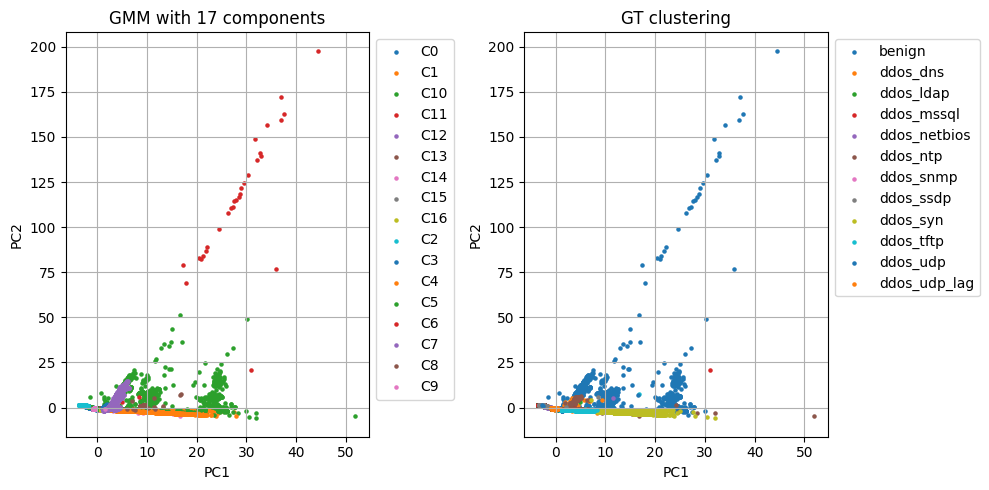

In [18]:
gmm = GaussianMixture(n_components=17, random_state=42, n_init=4, init_params='kmeans')
labels = gmm.fit_predict(pca_result)
df['cid_gmm'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_gmm):
    subdf = df[df.cid_gmm == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'GMM with 17 components')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

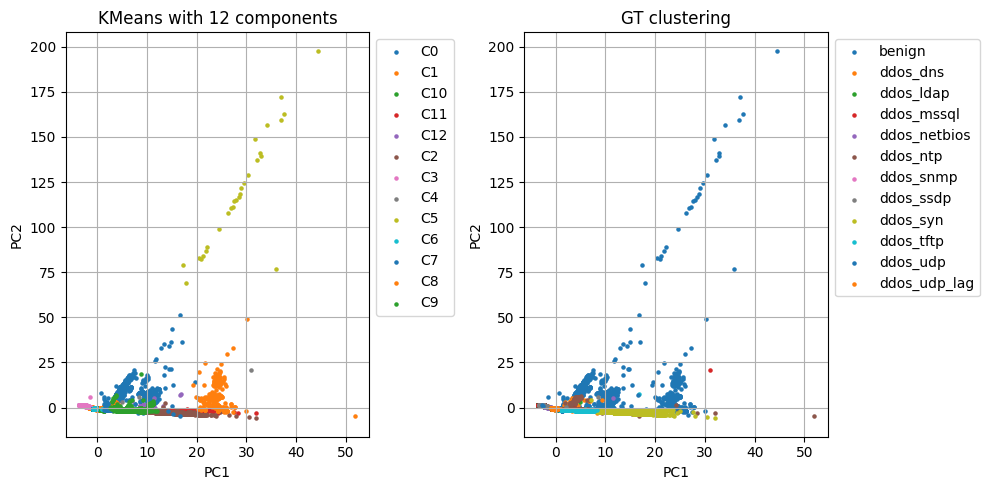

In [19]:
kmeans = KMeans(n_clusters=13, init='k-means++', random_state=42, n_init='auto')
labels = kmeans.fit_predict(pca_result)
df['cid_kmeans'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_kmeans):
    subdf = df[df.cid_kmeans == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'KMeans with 12 components')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

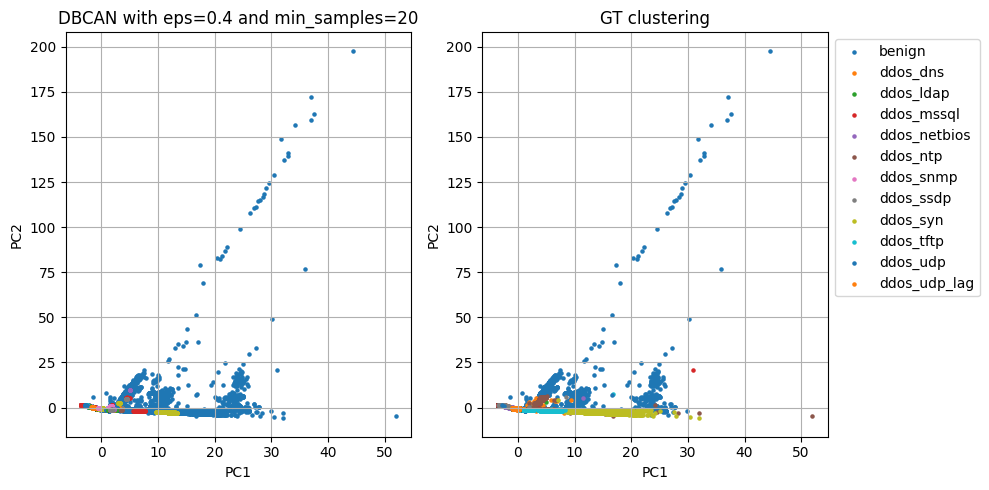

In [20]:
dbscan = DBSCAN(eps=0.4, min_samples=20)
labels = dbscan.fit_predict(pca_result)
df['cid_dbscan'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_dbscan):
    subdf = df[df.cid_dbscan == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'DBCAN with eps=0.4 and min_samples=20')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

In [26]:
features =  ['cid_kmeans', 'cid_gmm', 'cid_dbscan', 'label']
cluster_df = pd.DataFrame(df[features], columns=features)

Supervised metric clustering

In [47]:
print(f"Rand Index KMeans in respect of GT: {rand_score(cluster_df['cid_kmeans'], cluster_df['label'])}")
print(f"Rand Index GMM in respect of GT: {rand_score(cluster_df['cid_gmm'], cluster_df['label'])}")
print(f"Rand Index DBSCAN in respect of GT: {rand_score(cluster_df['cid_dbscan'], cluster_df['label'])}")

print(f"Adjusted Rand Index KMeans in respect of GT: {adjusted_rand_score(cluster_df['cid_kmeans'], cluster_df['label'])}")
print(f"Adjusted Rand Index GMM in respect of GT: {adjusted_rand_score(cluster_df['cid_gmm'], cluster_df['label'])}")
print(f"Adjusted Rand Index DBSCAN in respect of GT: {adjusted_rand_score(cluster_df['cid_dbscan'], cluster_df['label'])}")

Rand Index KMeans in respect of GT: 0.6890061538300377
Rand Index GMM in respect of GT: 0.8457118764775235
Rand Index DBSCAN in respect of GT: 0.883453581168817
Adjusted Rand Index KMeans in respect of GT: 0.204777960816118
Adjusted Rand Index GMM in respect of GT: 0.3740690260931276
Adjusted Rand Index DBSCAN in respect of GT: 0.3201245985123802


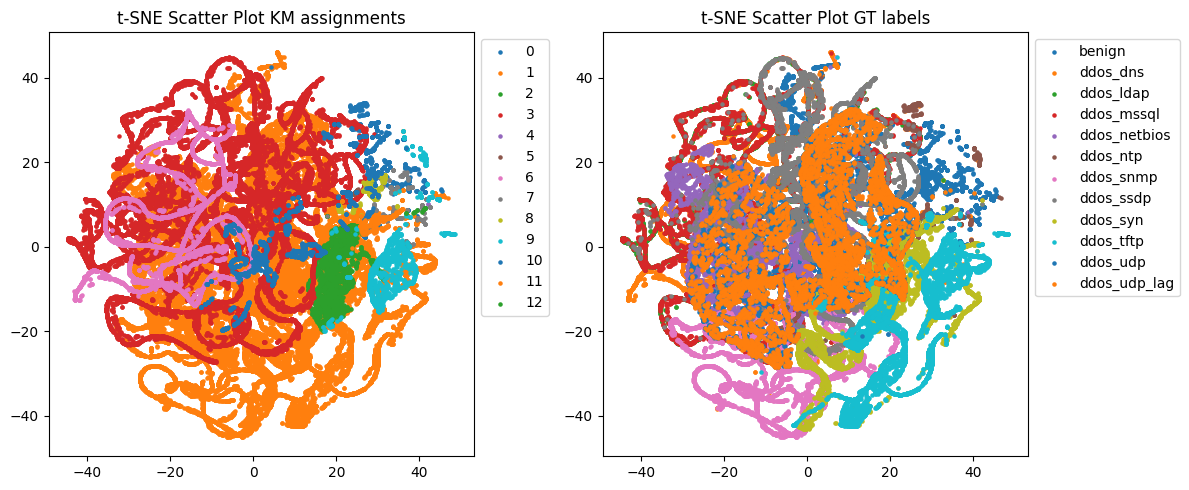

In [71]:
X_tsne = pd.read_csv('t_sne_dataframe', low_memory=False)
X_tsne['label'] = cluster_df['label'] 

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i in np.unique(X_tsne.KM):
    subdf = X_tsne[X_tsne.KM == i]
    axs[0].scatter(subdf['0'], subdf['1'], label=i, s=5)

for i in np.unique(X_tsne.label):
    subdf = X_tsne[X_tsne.label == i]
    axs[1].scatter(subdf['0'], subdf['1'], label=i, s=5)

lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left")

axs[0].set_title('t-SNE Scatter Plot KM assignments')
axs[1].set_title('t-SNE Scatter Plot GT labels')
plt.tight_layout()
plt.show()

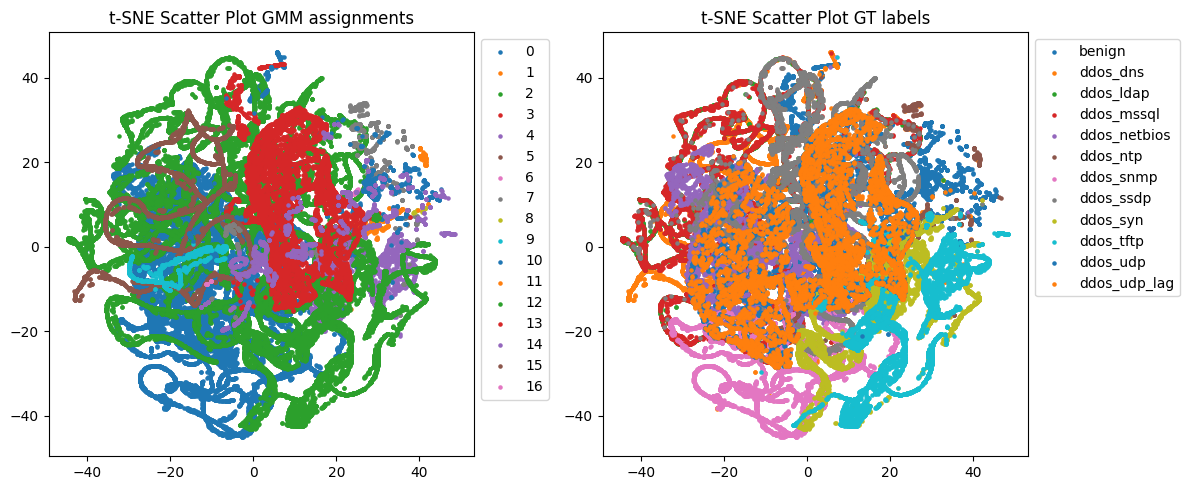

In [74]:
X_tsne = pd.read_csv('t_sne_dataframe', low_memory=False)
X_tsne['label'] = cluster_df['label'] 

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i in np.unique(X_tsne.GMM):
    subdf = X_tsne[X_tsne.GMM == i]
    axs[0].scatter(subdf['0'], subdf['1'], label=i, s=5)

for i in np.unique(X_tsne.label):
    subdf = X_tsne[X_tsne.label == i]
    axs[1].scatter(subdf['0'], subdf['1'], label=i, s=5)

lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left")

axs[0].set_title('t-SNE Scatter Plot GMM assignments')
axs[1].set_title('t-SNE Scatter Plot GT labels')
plt.tight_layout()
plt.show()

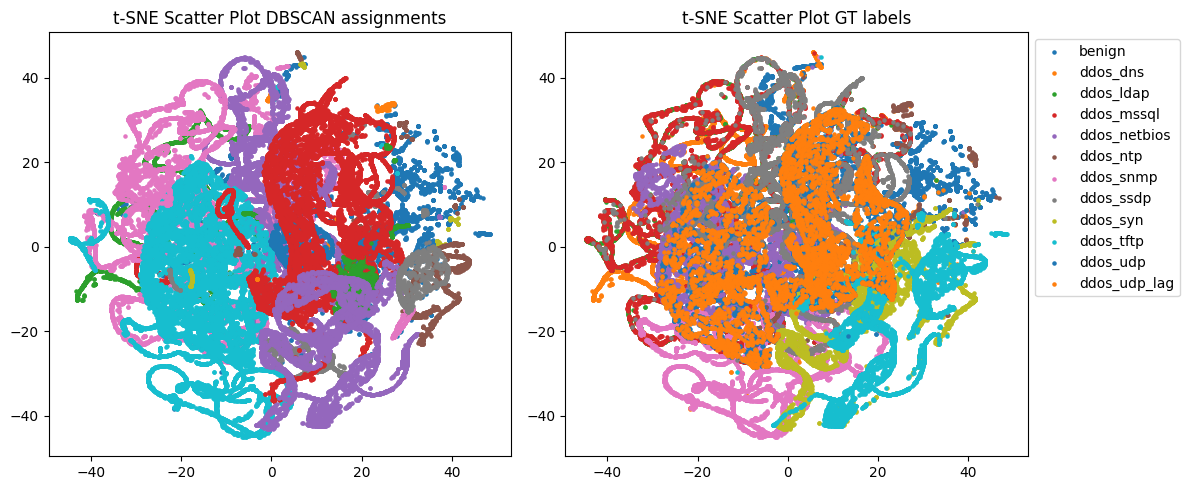

In [75]:
X_tsne = pd.read_csv('t_sne_dataframe', low_memory=False)
X_tsne['label'] = cluster_df['label'] 

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i in np.unique(X_tsne.DBSCAN):
    subdf = X_tsne[X_tsne.DBSCAN == i]
    axs[0].scatter(subdf['0'], subdf['1'], label=i, s=5)

for i in np.unique(X_tsne.label):
    subdf = X_tsne[X_tsne.label == i]
    axs[1].scatter(subdf['0'], subdf['1'], label=i, s=5)

lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left")

axs[0].set_title('t-SNE Scatter Plot DBSCAN assignments')
axs[1].set_title('t-SNE Scatter Plot GT labels')
plt.tight_layout()
plt.show()

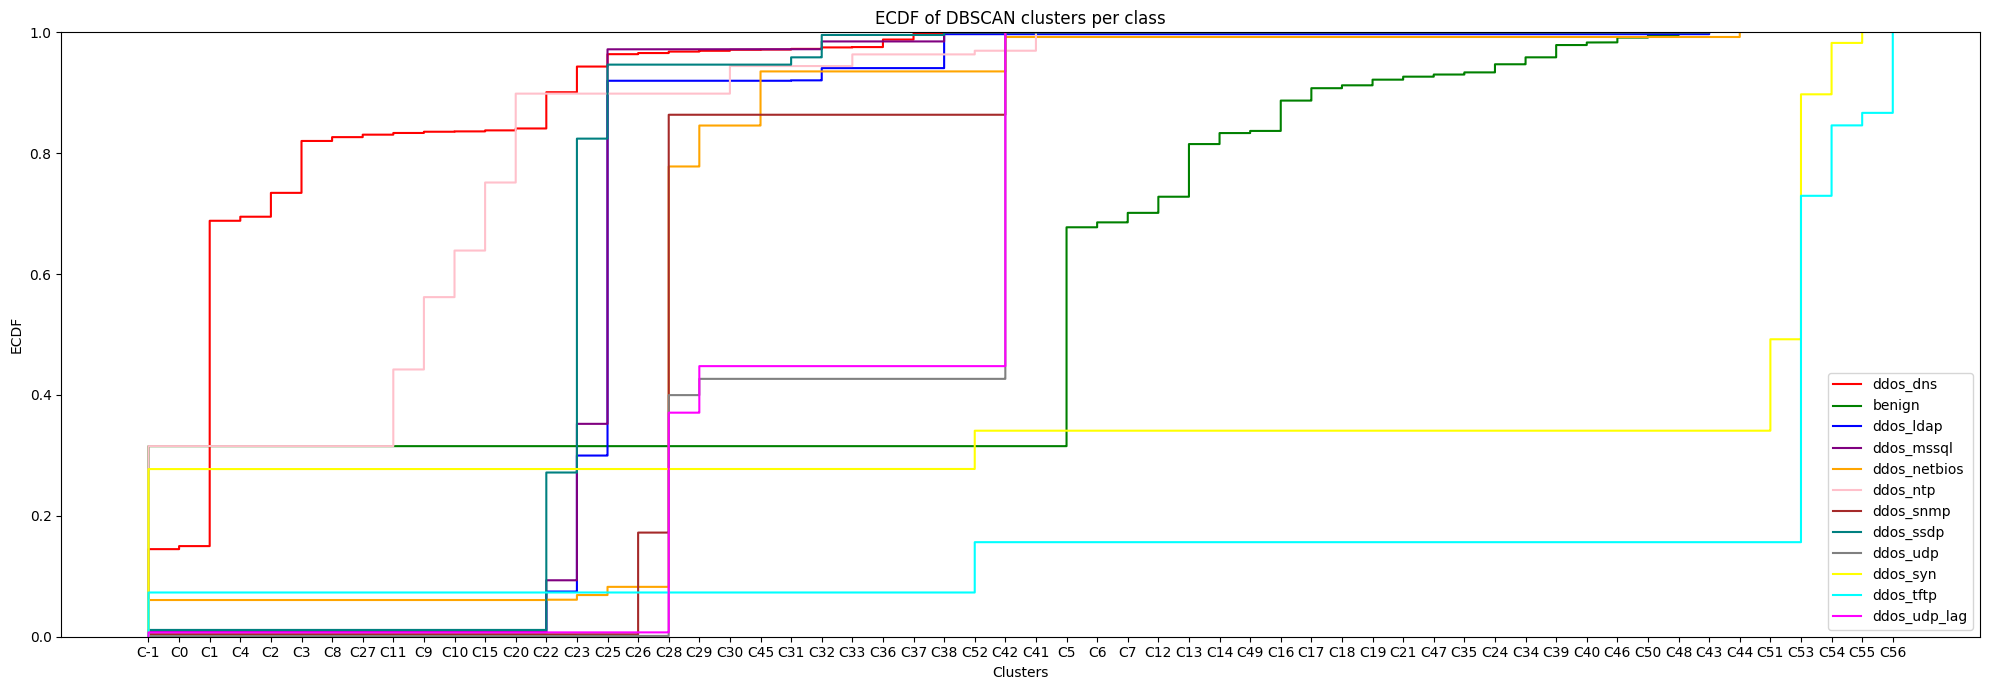

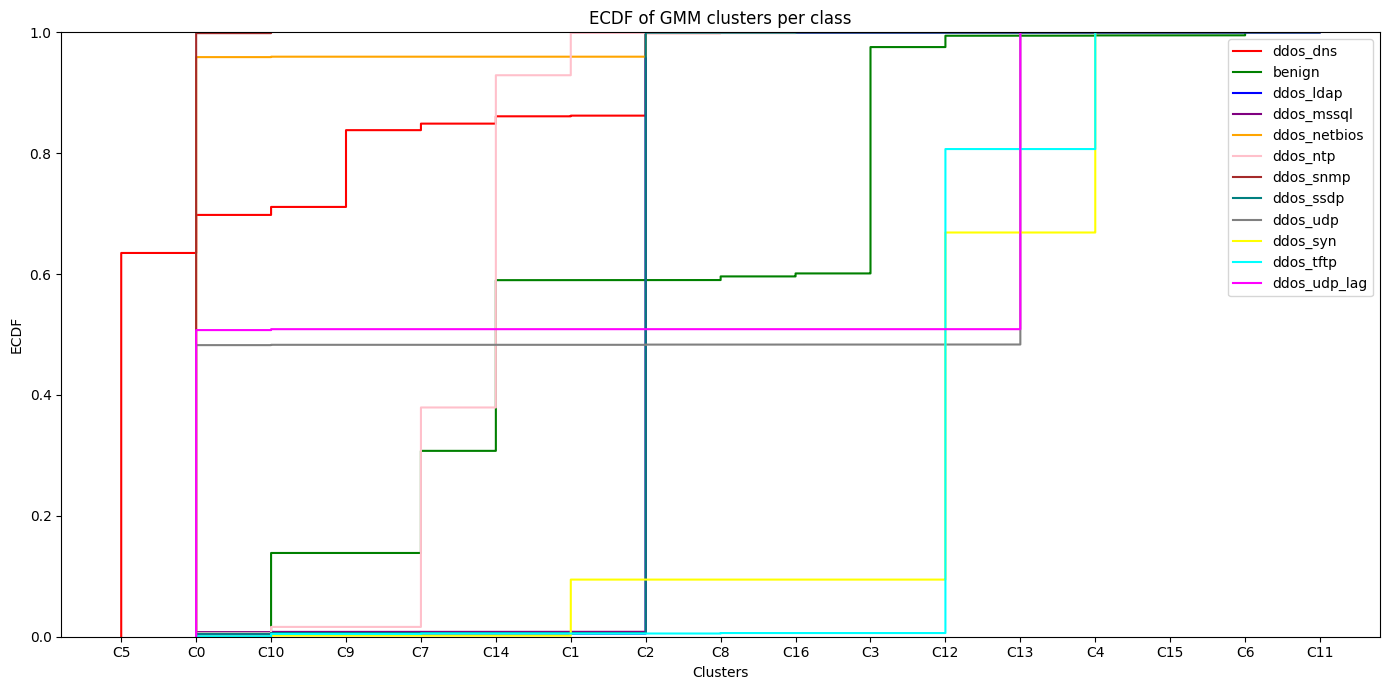

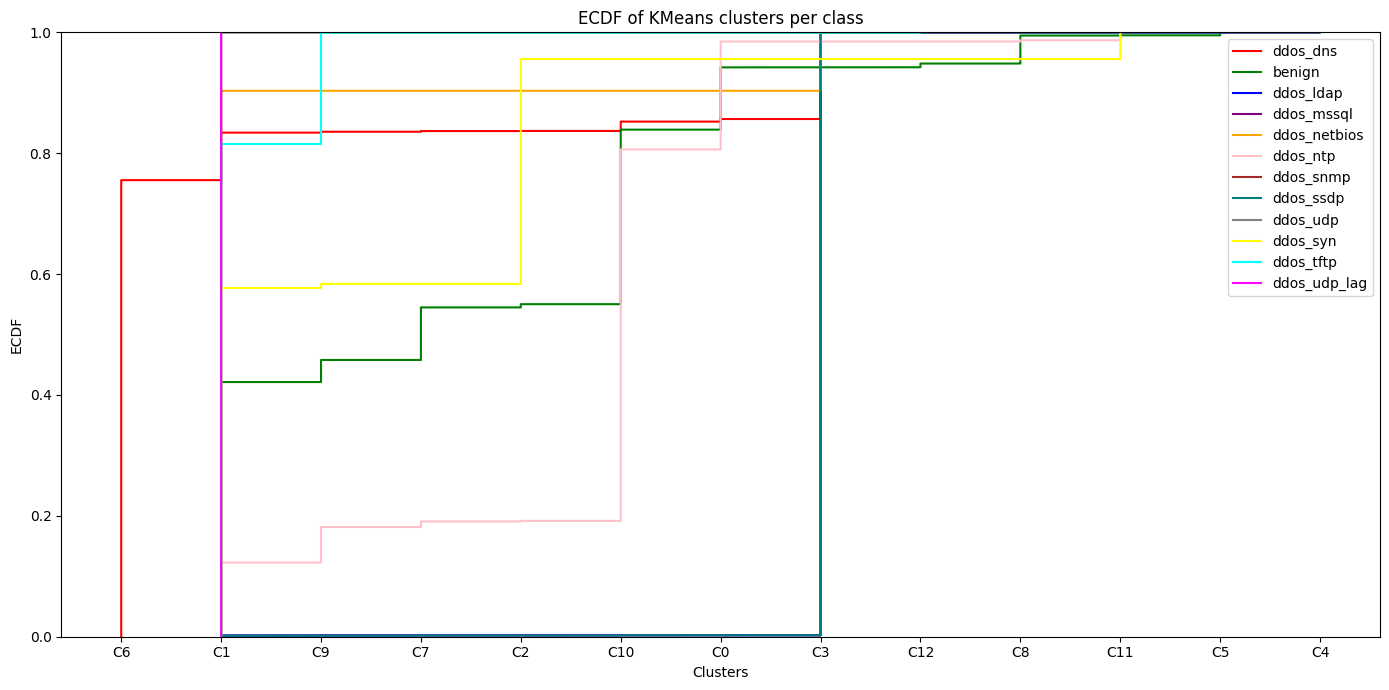

In [76]:
plt.figure(figsize=(20, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown', 'teal', 'gray', 'yellow', 'cyan', 'magenta']
# DBSCAN
for color, label in zip(colors, cluster_df['label'].unique()):
    flows_per_cluster = cluster_df[cluster_df['label'] == label]['cid_dbscan']  
    sns.ecdfplot(flows_per_cluster, label=label, color=color)


plt.title('ECDF of DBSCAN clusters per class')
plt.xlabel('Clusters')
plt.ylabel('ECDF')
plt.tight_layout()
plt.legend()
plt.show()

plt.figure(figsize=(14,7))
# GMM
for color, label in zip(colors, cluster_df['label'].unique()):
    flows_per_cluster = cluster_df[cluster_df['label'] == label]['cid_gmm']  
    sns.ecdfplot(flows_per_cluster, label=label, color=color)


plt.title('ECDF of GMM clusters per class')
plt.xlabel('Clusters')
plt.ylabel('ECDF')
plt.tight_layout()
plt.legend()
plt.show()

plt.figure(figsize=(14,7))
# KMeans
for color, label in zip(colors, cluster_df['label'].unique()):
    flows_per_cluster = cluster_df[cluster_df['label'] == label]['cid_kmeans']  
    sns.ecdfplot(flows_per_cluster, label=label, color=color)


plt.title('ECDF of KMeans clusters per class')
plt.xlabel('Clusters')
plt.ylabel('ECDF')
plt.tight_layout()
plt.legend()
plt.show()

In [58]:
df = pd.read_csv('ddos_scaled.csv', low_memory=False).drop(columns='Unnamed: 0')
pca_result = pd.read_csv('pca_dataframe.csv', low_memory=False)

In [99]:
k_model = KMeans(n_clusters=13, init='k-means++', random_state=42, n_init='auto')
labels = k_model.fit(pca_result).labels_
df['kmeans'] = labels
#df['kmeans'] = df['kmeans'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:1})

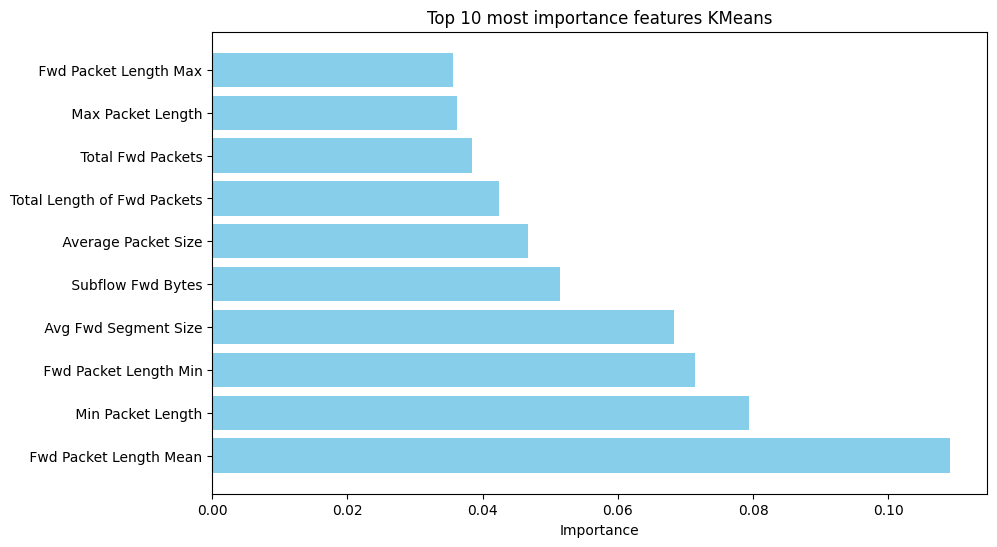

In [100]:
clf = RandomForestClassifier(random_state=1)
columns = df.columns.drop('kmeans')
clf.fit(df[columns], df['kmeans'])

feature_importance = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':df.columns.drop('kmeans'), 'Importance':feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 most importance features KMeans')
plt.show()

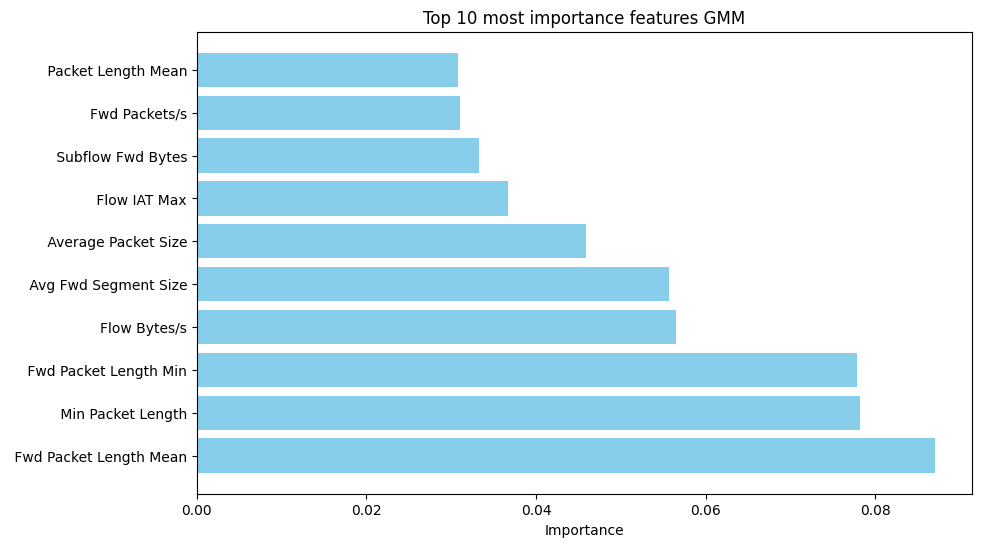

In [104]:
df = pd.read_csv('ddos_scaled.csv', low_memory=False).drop(columns='Unnamed: 0')
gmm = GaussianMixture(n_components=17, random_state=42, n_init=4, init_params='kmeans')
labels = gmm.fit_predict(pca_result)
df['gmm'] = labels
#df['gmm'] = df['gmm'].map({0:1, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 16: 0})
rf_gmm = RandomForestClassifier(random_state=1)
columns = df.columns.drop('gmm')
rf_gmm.fit(df[columns], labels)

feature_importance = rf_gmm.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':df.columns.drop('gmm'), 'Importance':feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 most importance features GMM')
plt.show()

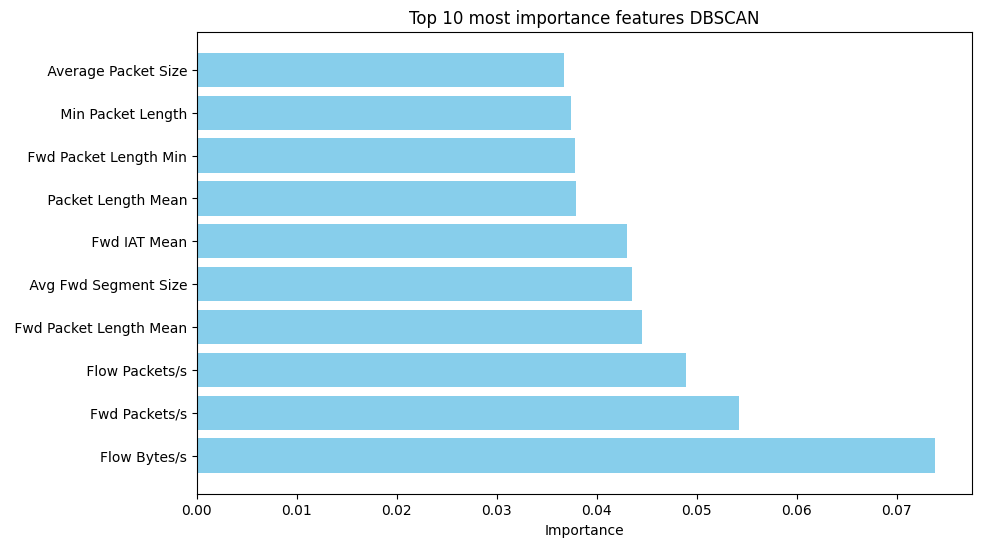

In [106]:
df = pd.read_csv('ddos_scaled.csv', low_memory=False).drop(columns='Unnamed: 0')

dbscan = DBSCAN(eps=0.4, min_samples=20)
labels = dbscan.fit_predict(pca_result)

rf_dbscan = RandomForestClassifier(random_state=1)
rf_dbscan.fit(df, labels)

feature_importance = rf_dbscan.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':df.columns, 'Importance':feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 most importance features DBSCAN')
plt.show()

In [ ]:
# df = pd.read_csv('ddos_scaled.csv', low_memory=False).drop(columns='Unnamed: 0')
# labels = KMeans(n_clusters=13, init='k-means++', random_state=42, n_init='auto').fit_predict(pca_result)

# model = XGBClassifier()
# model.fit(df, labels)
# explainer = shap.TreeExplainer(model, feature_names=df.columns)
# shap_values = explainer(df)
# shap.summary_plot(shap_values.values, df, sort=False)